In [1]:
import pandas as pd
import numpy as np

In [2]:
disc = pd.read_csv('D:/husky mail/NEU/NEU COURSES/6080 - Integrated Experiential Project/SEC - DISC/DISC raw full.csv')

In [3]:
issr = pd.read_csv('D:/husky mail/NEU/NEU COURSES/6080 - Integrated Experiential Project/SEC - ISSR/ISSR raw full.csv')

In [4]:
df = pd.merge(disc, issr, on=['Accession Number', 'Table Name', 'Number of Records'])

### Prepare data for clustering / kmean / knearest

In [5]:
df_num = df[['Accession Number','Act Received Most Recent Fiscal Year', 'Act Received Prior Fiscal Year',
                  'Cost Goods Sold Most Recent Fiscal Year','Cost Goods Sold Prior Fiscal Year', 'Current Employees', 
                  'Long Term Debt Most Recent Fiscal Year', 'Long Term Debt Prior Fiscal Year','Maximum Offering Amount',
                  'Net Income Most Recent Fiscal Year', 'Net Income Prior Fiscal Year', 'No Of Security Offered',
                  'Offering Amount','Short Term Debt Most Recent Fiscal Year', 'Short Term Debt Prior Fiscal Year',
                  'Taxes Paid Most Recent Fiscal Year', 'Taxes Paid Prior Fiscal Year', 'Total Asset Most Recent Fiscal Year',
                  'Total Asset Prior Fiscal Year','Cash Equi Most Recent Fiscal Year']]

In [6]:
df_num.isnull().sum()

Accession Number                              0
Act Received Most Recent Fiscal Year        335
Act Received Prior Fiscal Year              335
Cost Goods Sold Most Recent Fiscal Year     335
Cost Goods Sold Prior Fiscal Year           335
Current Employees                           335
Long Term Debt Most Recent Fiscal Year      335
Long Term Debt Prior Fiscal Year            335
Maximum Offering Amount                    1050
Net Income Most Recent Fiscal Year          335
Net Income Prior Fiscal Year                335
No Of Security Offered                     2114
Offering Amount                             992
Short Term Debt Most Recent Fiscal Year     335
Short Term Debt Prior Fiscal Year           335
Taxes Paid Most Recent Fiscal Year          335
Taxes Paid Prior Fiscal Year                335
Total Asset Most Recent Fiscal Year         335
Total Asset Prior Fiscal Year               335
Cash Equi Most Recent Fiscal Year           335
dtype: int64

In [7]:
df_num = df_num.dropna(axis=0, subset=['Act Received Most Recent Fiscal Year'])
df_num.isnull().sum()

Accession Number                              0
Act Received Most Recent Fiscal Year          0
Act Received Prior Fiscal Year                0
Cost Goods Sold Most Recent Fiscal Year       0
Cost Goods Sold Prior Fiscal Year             0
Current Employees                             0
Long Term Debt Most Recent Fiscal Year        0
Long Term Debt Prior Fiscal Year              0
Maximum Offering Amount                     715
Net Income Most Recent Fiscal Year            0
Net Income Prior Fiscal Year                  0
No Of Security Offered                     1779
Offering Amount                             657
Short Term Debt Most Recent Fiscal Year       0
Short Term Debt Prior Fiscal Year             0
Taxes Paid Most Recent Fiscal Year            0
Taxes Paid Prior Fiscal Year                  0
Total Asset Most Recent Fiscal Year           0
Total Asset Prior Fiscal Year                 0
Cash Equi Most Recent Fiscal Year             0
dtype: int64

In [8]:
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler

In [9]:
df_finance = df_num.drop(['Accession Number','Current Employees','Maximum Offering Amount','No Of Security Offered',
                         'Offering Amount', 'Cash Equi Most Recent Fiscal Year'], axis = 1)
df_finance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6526 entries, 0 to 6860
Data columns (total 14 columns):
Act Received Most Recent Fiscal Year       6526 non-null float64
Act Received Prior Fiscal Year             6526 non-null float64
Cost Goods Sold Most Recent Fiscal Year    6526 non-null float64
Cost Goods Sold Prior Fiscal Year          6526 non-null float64
Long Term Debt Most Recent Fiscal Year     6526 non-null float64
Long Term Debt Prior Fiscal Year           6526 non-null float64
Net Income Most Recent Fiscal Year         6526 non-null float64
Net Income Prior Fiscal Year               6526 non-null float64
Short Term Debt Most Recent Fiscal Year    6526 non-null float64
Short Term Debt Prior Fiscal Year          6526 non-null float64
Taxes Paid Most Recent Fiscal Year         6526 non-null float64
Taxes Paid Prior Fiscal Year               6526 non-null float64
Total Asset Most Recent Fiscal Year        6526 non-null float64
Total Asset Prior Fiscal Year              6526 

In [10]:
mms = MinMaxScaler()
mms.fit(df_finance)
finance_transform = mms.transform(df_finance)

### Define appropriate k

In [11]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(finance_transform)
    Sum_of_squared_distances.append(km.inertia_)

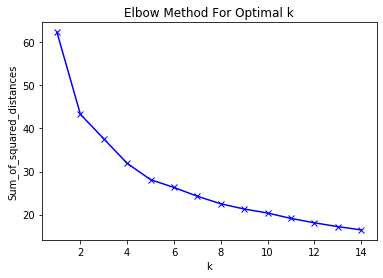

In [12]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

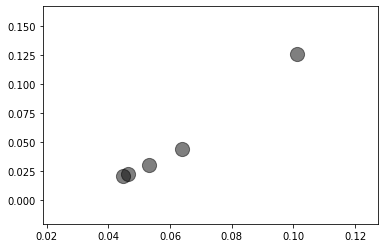

In [13]:
km_finance = KMeans(n_clusters=5).fit(finance_transform)
centers = km_finance.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [19]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = df_finance.index.values
cluster_map['cluster'] = km_finance.labels_
df_finance['cluster'] = cluster_map['cluster']
df_finance['cluster'].value_counts()

3.0    5405
0.0     634
1.0     133
2.0      46
4.0       1
Name: cluster, dtype: int64

In [15]:
cluster_map[cluster_map.cluster == 4]

,data_index,cluster
4832,5051,4


## Trying to get success companies

In [86]:
result = pd.DataFrame(data = df['Progress Update'])
result = result.dropna()
result.astype('str')
result

,Progress Update
122,Issuer reached Offering Deadline (7-22-16). To...
138,"Total Investment: $999,999.00. Shares Sold: 14..."
140,"$335,111 in investments. Payments are still be..."
143,"$1,000,000.00 in investments. Payments are sti..."
153,"Total Investment: $101,386.00. Due to a glitch..."
...,...
6812,"$282,000 in investments. Payments still being ..."
6834,"At the close of the offering, the issuer close..."
6849,"The offering ended successfully on March 28, 2..."
6851,"The Offering closed successfully on March 23,2..."


In [87]:
sresult = result['Progress Update'].str.split()
sresult

122     [Issuer, reached, Offering, Deadline, (7-22-16...
138     [Total, Investment:, $999,999.00., Shares, Sol...
140     [$335,111, in, investments., Payments, are, st...
143     [$1,000,000.00, in, investments., Payments, ar...
153     [Total, Investment:, $101,386.00., Due, to, a,...
                              ...                        
6812    [$282,000, in, investments., Payments, still, ...
6834    [At, the, close, of, the, offering,, the, issu...
6849    [The, offering, ended, successfully, on, March...
6851    [The, Offering, closed, successfully, on, Marc...
6854    [The, Offering, closed, successfully, on, 3/30...
Name: Progress Update, Length: 1023, dtype: object

In [89]:
a1 = np.array(['successfully','success','successful','100%'])
def assign_sf(result_):
    sresult = result_.split()
    for j in range(0, len(sresult)):
        if sresult[j] in a1:
            return 'success'
            pass
result['classification'] = result['Progress Update'].apply(lambda x: assign_sf(x))
print(result['classification'].value_counts())
print(result)

success    82
Name: classification, dtype: int64
                                        Progress Update classification
122   Issuer reached Offering Deadline (7-22-16). To...           None
138   Total Investment: $999,999.00. Shares Sold: 14...           None
140   $335,111 in investments. Payments are still be...           None
143   $1,000,000.00 in investments. Payments are sti...           None
153   Total Investment: $101,386.00. Due to a glitch...           None
...                                                 ...            ...
6812  $282,000 in investments. Payments still being ...           None
6834  At the close of the offering, the issuer close...           None
6849  The offering ended successfully on March 28, 2...        success
6851  The Offering closed successfully on March 23,2...        success
6854  The Offering closed successfully on 3/30, havi...        success

[1023 rows x 2 columns]


In [90]:
df_finance['classification'] = result['classification']
df_num['classification'].value_counts()

Series([], Name: classification, dtype: int64)

#### References
https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f